# 🧭 Phase 1: Business Understanding

## 1.1 Project Overview
Breast cancer remains one of the leading causes of mortality among women worldwide. Advances in genomics and clinical data collection have created opportunities to better understand cancer behavior and guide personalized treatment strategies.  

The **METABRIC (Molecular Taxonomy of Breast Cancer International Consortium)** dataset provides detailed **clinical**, **pathological**, and **gene-expression** information for nearly 2,000 breast cancer patients. This makes it ideal for developing data-driven systems that can help predict patient outcomes and recommend potential treatment approaches.  

This project aims to combine **machine learning**, **statistical analysis**, and **data-driven modeling** to build a predictive system that:
- Estimates **patient survival outcomes**, and  
- Suggests **potential treatment options** (such as chemotherapy, hormone therapy, or targeted therapy) based on similar patient profiles.  

Ultimately, the system will be deployed as a **web-based application (Django + React)** that clinicians and researchers can use to explore predictions and recommendations interactively.

---

## 1.2 Business Objectives
The primary objectives of this project are:
1. **Predict survival outcomes** using both clinical and gene-expression data.  
2. **Identify key clinical and genomic factors** that influence patient survival and treatment response.  
3. **Recommend possible treatment paths** based on patterns learned from patients with similar profiles and treatment histories.  
4. **Deploy** the model as a web application for demonstration and educational purposes.

---

## 1.3 Research Questions
This project will seek to answer the following key research questions:

1. **Predictive Insight:**  
   Which clinical and genetic features are most predictive of breast cancer survival outcomes?  

2. **Treatment Recommendation:**  
   Can we identify the most effective treatment approaches (e.g., hormone therapy, radiotherapy, chemotherapy) for patients with specific gene-expression profiles?  

3. **Pattern Discovery:**  
   How do different molecular subtypes (e.g., Luminal A, Basal-like, HER2-enriched) correlate with overall survival and treatment response?  

4. **Model Interpretability:**  
   How can the model’s predictions and recommendations be made interpretable and clinically meaningful for decision support?

---

## 1.4 Project Success Criteria
The success of the project will be measured through:
- **Model performance:**  
  - Survival prediction models: Accuracy ≥ 0.85, AUC ≥ 0.90  
  - Treatment recommendation models: Top-3 accuracy ≥ 0.75  
- **Feature discovery:** Identification of the top 20 features (genes + clinical attributes) that most influence survival and treatment outcomes.  
- **Deployment:** Fully functional web application (Django backend, React frontend) hosted on **Render** and **Vercel**.  
- **Collaboration & Documentation:** Reproducible workflow managed on GitHub and documented in Notion.

---

> **Summary:**  
> This phase establishes the business motivation, project scope, objectives, and research focus.  
> The next phase — *Data Understanding* — will involve exploring the METABRIC dataset in detail, performing EDA, and identifying relationships between features, survival outcomes, and treatment variables.


## 📊 2. Data Understanding  

### 2.1 Data Collection  
The data used in this project was obtained from the **[cBioPortal for Cancer Genomics](https://www.cbioportal.org/)**, specifically from the **METABRIC (Molecular Taxonomy of Breast Cancer International Consortium)** study.  
The METABRIC dataset is a large-scale breast cancer resource that integrates both **clinical** and **genomic** information from nearly **2,000 patients**, making it one of the most comprehensive datasets available for breast cancer research.  

Two datasets were downloaded and later merged:  
- **Clinical Data:** Containing patient demographics, tumor characteristics, receptor status, treatment details, and survival outcomes.  
- **mRNA Expression Data:** Containing expression levels for over **20,000 genes**, capturing molecular-level tumor variations.  

**Dataset link:**  
🔗 [METABRIC (Breast Cancer) — cBioPortal](https://www.cbioportal.org/study/summary?id=brca_metabric)

---

### 2.2 Data Description  
- **Clinical Dataset:** Includes variables such as  
  *Age at Diagnosis, Tumor Size, Tumor Stage, Histologic Grade, ER/PR/HER2 Status, Menopausal State, Treatment Type (Chemotherapy, Hormone Therapy, Radiotherapy), and Survival Information (Overall Survival Status and Duration).*  

- **mRNA Dataset:** Includes high-dimensional gene expression values (over 20,000 gene features) for each patient. These features represent the expression intensity of various genes and serve as genomic indicators of tumor behavior.  

The two datasets were **merged using the Patient ID** as the key identifier, resulting in a single integrated dataset containing both **clinical** and **molecular** attributes.

---

### 2.3 Data Quality and Preparation Notes  
Initial inspection showed that both datasets were well-structured but contained missing values in some clinical attributes (e.g., receptor status, treatment indicators).  
Appropriate cleaning techniques were applied, including:  
- Handling missing or inconsistent entries  
- Encoding categorical features  
- Converting data types for modeling  

Due to the **curse of dimensionality** associated with over 20,000 genomic features, feature selection was performed.  
Instead of using all genes, we focused on a subset of **biologically significant genes** (e.g., *BRCA1, BRCA2, TP53, ERBB2*) based on **domain knowledge and breast cancer literature**.  
This approach improved interpretability and model performance.

---

### 2.4 Initial Data Exploration  
Exploratory analysis was conducted to understand the distribution of clinical variables and survival outcomes.  
Key patterns observed include:  
- Most patients were diagnosed between the ages of 45–70.  
- Early-stage tumors (Stage 1) were associated with higher survival rates, while advanced stages (Stages 3–4) showed higher mortality.  
- Hormone receptor status (ER, PR, HER2) showed strong relationships with treatment types and outcomes.  

These insights guided feature selection and informed the modeling strategy used in subsequent stages.

---

### 📚 Data Citation  
Cerami, E., Gao, J., Dogrusoz, U. *et al.* (2012). **The cBio Cancer Genomics Portal: An Open Platform for Exploring Multidimensional Cancer Genomics Data.** *Cancer Discovery, 2(5), 401–404.*  
Accessed from [https://www.cbioportal.org/study/summary?id=brca_metabric](https://www.cbioportal.org/study/summary?id=brca_metabric)



In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


____
### Loading the data set.

Since we have two data sets , clinical and the mrna genomic respectively, we start by loading the individual datasets cleaning them individually then merging then cleaning again.

We use the separator (sep='\t') because our data is separated by tabs not commas or spaces.
___

In [16]:
#loading the datasets
clinical_df= pd.read_csv('brca_metabric_clinical_data.tsv',sep='\t')
clinical_df.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,140.500000,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,84.633333,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,153.300000,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,...,164.933333,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,18.800000,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease


In [18]:
clinical_df['Tumor Stage'].value_counts()

Tumor Stage
2.0    979
1.0    630
3.0    144
0.0     24
4.0     11
Name: count, dtype: int64

In [20]:
clinical_df.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status'],
      dtype='object')

In [22]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Study ID                        2509 non-null   object 
 1   Patient ID                      2509 non-null   object 
 2   Sample ID                       2509 non-null   object 
 3   Age at Diagnosis                2498 non-null   float64
 4   Type of Breast Surgery          1955 non-null   object 
 5   Cancer Type                     2509 non-null   object 
 6   Cancer Type Detailed            2509 non-null   object 
 7   Cellularity                     1917 non-null   object 
 8   Chemotherapy                    1980 non-null   object 
 9   Pam50 + Claudin-low subtype     1980 non-null   object 
 10  Cohort                          2498 non-null   float64
 11  ER status measured by IHC       2426 non-null   object 
 12  ER Status                       24

In [24]:
#starting with the clinical_df
clinical_df.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Number of Samples Per Patient,TMB (nonsynonymous),Tumor Size,Tumor Stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2358.000000,2287.000000,1981.000000,2388.000000,2509.0,2509.000000,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.590755,4.028787,125.244271,110.293649,1.0,6.849746,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.989171,1.189092,76.111772,77.539698,0.0,5.320394,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,60.866667,41.100000,1.0,3.922553,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,116.466667,100.416667,1.0,6.537589,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,185.133333,169.875000,1.0,9.152624,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,81.000000,7.200000,355.200000,389.333333,1.0,104.601416,182.000000,4.000000


# ⚙️ 3. Data Preparation

## 3.1 Data Merging
Two datasets — **clinical** and **mRNA expression** — were merged using the common identifier **Patient ID**.  
This integration created a single dataset that combines both clinical characteristics and genomic features, enabling a comprehensive analysis of breast cancer outcomes and treatment responses.

---

## 3.2 Handling Missing Values
The merged dataset contained missing values, especially within clinical variables such as receptor status and treatment indicators.  
To address this:  
- **Categorical variables** (e.g., ER Status, PR Status) were imputed using the mode or labeled as *“Unknown.”*  
- **Numerical variables** (e.g., Age, Tumor Size) were filled with the mean or median values.  

This approach minimized data loss while maintaining consistency across the dataset.

---

## 3.3 Feature Selection
Given the high dimensionality of the genomic data (~20,000 genes), including all features would lead to the **curse of dimensionality** and overfitting.  
To address this, we selected a subset of **biologically significant genes** based on domain knowledge and published breast cancer research. Examples include:  
**BRCA1, BRCA2, TP53, ERBB2, ESR1, PGR,** and **PIK3CA**.  

These were combined with clinically relevant variables such as:  
- Age at Diagnosis  
- Tumor Size and Stage  
- Histologic Grade  
- ER, PR, and HER2 Status  
- Menopausal State  
- Mutation Count  
- Nottingham Prognostic Index  

This hybrid feature set balanced interpretability and predictive performance.

---

## 3.4 Encoding Categorical Variables
Machine learning algorithms require numerical input, so categorical variables were encoded as follows:  
- **Binary features** (e.g., Positive/Negative) → encoded as `1` and `0`.  
- **Nominal features** (e.g., Tumor Stage, Menopausal State) → one-hot encoded.  

This ensured that no unintended ordinal relationships were introduced.

---

## 3.5 Feature Scaling
Continuous numerical variables such as **Age at Diagnosis**, **Tumor Size**, and **Mutation Count** were standardized using **z-score normalization** (mean = 0, standard deviation = 1).  
Scaling ensures that features contribute equally during model training, particularly for algorithms sensitive to feature magnitudes (e.g., Logistic Regression, Gradient Boosting).

---

## 3.6 Defining Target Variables
Two target variables were defined based on the project objectives:  
1. **Overall Survival Status:** Binary classification target indicating patient survival.  
2. **Treatment Type:** Multi-label target representing whether the patient received **Chemotherapy**, **Hormone Therapy**, or **Radiotherapy**.  

This enables the development of separate models for survival prediction and treatment recommendation.

---

## 3.7 Final Dataset Summary
After merging, cleaning, encoding, and scaling, the dataset was ready for modeling.  
It contains:  
- **Predictor variables (X):** Selected clinical and genomic features.  
- **Target variables (y):** `Overall Survival Status` and `['Chemotherapy', 'Hormone Therapy', 'Radio Therapy']`.  

---

## 3.8 Dataset Overview Table

| Metric | Description |
|--------|--------------|
| Rows | Number of patient observations |
| Columns | Combined clinical and selected gene features |
| Selected Genes | BRCA1, BRCA2, TP53, ERBB2, ESR1, PGR, PIK3CA |
| Clinical Features | Age, Tumor Size, Stage, Grade, ER/PR/HER2, Menopausal State |
| Missing Values | Imputed or labeled as “Unknown” |
| Scaling | Z-score normalization |
| Encoding | Binary and one-hot encoding |


In [26]:
#checking the missing values clinical
clinical_df.isna().sum()

Study ID                            0
Patient ID                          0
Sample ID                           0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    151
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Surv

In [28]:
#calculating the percentage of missing values
missing_percentage = (clinical_df.isna().sum() / len(clinical_df)) * 100
#filter columns with more than 50% missing values
missing_greater_than_50 = missing_percentage[missing_percentage > 50]
missing_greater_than_50 
#shows that non of our columns have ore than 50% missing values

Series([], dtype: float64)

___

Since non of our columns have missing values greater than 50% , we will not drop any columns based on missing data. Instead, we impute our missing values with median dor the numerical columns and unknown for the categorical columns.

We impute with median rather than mean or mode because the median is less sensitive to outliers and keeps the data distribution more accurate when the data is skewed.
___

In [30]:
#imputing missing values
#dividing into categorical and numerical columns.
num_col= clinical_df.select_dtypes(include=['float64', 'int64']).columns
cat_col=clinical_df.select_dtypes(include=['object']).columns
#imputing numerical columns with median and categorical columns with 'Unknown'
for col in num_col:
    median=clinical_df[col].median()
    clinical_df[col].fillna(median,inplace=True)
#for the categorical
for cols in cat_col:
    clinical_df[cols].fillna('Unknown',inplace=True)

In [32]:
#confirming that we have zero missing values
clinical_df.isna().sum()

Study ID                          0
Patient ID                        0
Sample ID                         0
Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                   

In [34]:
#checking for duplicates
clinical_df.duplicated().sum()

0

In [36]:
#dropping identifier columns
cols_to_drop = [
    'Study ID',
    'Sample ID',
    'Sample Type',
    'Oncotree Code',
    'Number of Samples Per Patient'
]

clinical_df = clinical_df.drop(columns=cols_to_drop, errors='ignore')
clinical_df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Unknown,NO,claudin-low,1.0,Positve,...,Negative,YES,140.500000,0:Not Recurred,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,1.0,Positve,...,Positive,YES,84.633333,0:Not Recurred,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,1.0,Positve,...,Positive,NO,153.300000,1:Recurred,Female,Unknown,2.615035,15.0,2.0,Died of Disease
3,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,1.0,Positve,...,Positive,YES,164.933333,0:Not Recurred,Female,Unknown,1.307518,25.0,2.0,Living
4,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,1.0,Positve,...,Positive,YES,18.800000,1:Recurred,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease


___

Identifier columns are dropped because they do not carry any meaningful information about the patterns or the relationship of our data.
___

In [38]:
clinical_df.shape #confirming there's less columns

(2509, 34)

In [40]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2509 non-null   float64
 2   Type of Breast Surgery          2509 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     2509 non-null   object 
 6   Chemotherapy                    2509 non-null   object 
 7   Pam50 + Claudin-low subtype     2509 non-null   object 
 8   Cohort                          2509 non-null   float64
 9   ER status measured by IHC       2509 non-null   object 
 10  ER Status                       2509 non-null   object 
 11  Neoplasm Histologic Grade       2509 non-null   float64
 12  HER2 status measured by SNP6    25

In [18]:
#checking dtype consistency
# refresh categorical columns after dropping identifiers
cat_col = clinical_df.select_dtypes(include=['object']).columns.tolist()
clinical_df[cat_col].dtypes

Patient ID                        object
Type of Breast Surgery            object
Cancer Type                       object
Cancer Type Detailed              object
Cellularity                       object
Chemotherapy                      object
Pam50 + Claudin-low subtype       object
ER status measured by IHC         object
ER Status                         object
HER2 status measured by SNP6      object
HER2 Status                       object
Tumor Other Histologic Subtype    object
Hormone Therapy                   object
Inferred Menopausal State         object
Integrative Cluster               object
Primary Tumor Laterality          object
Overall Survival Status           object
PR Status                         object
Radio Therapy                     object
Relapse Free Status               object
Sex                               object
3-Gene classifier subtype         object
Patient's Vital Status            object
dtype: object

In [19]:
num_col = clinical_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
clinical_df[num_col].dtypes

Age at Diagnosis                 float64
Cohort                           float64
Neoplasm Histologic Grade        float64
Lymph nodes examined positive    float64
Mutation Count                   float64
Nottingham prognostic index      float64
Overall Survival (Months)        float64
Relapse Free Status (Months)     float64
TMB (nonsynonymous)              float64
Tumor Size                       float64
Tumor Stage                      float64
dtype: object

___
### Loading the second dataset

We load the mrna genomic features dataset and do the necessary cleaning that is checking for missing values and duplicates as well as handling them. We also check various features of this data set such as the dtypes, the columns etc.

We drop identifier columns such as entrez_Gene_id.

We also transpose the dataset since the genes are rows and the columns have the patients.
___


In [42]:
#loading the second dataset
mrna_df=pd.read_csv('data_mrna_illumina_microarray_zscores_ref_diploid_samples.txt', sep='\t', header=0)

In [43]:
#second dataset
mrna_df.head()

,Hugo_Symbol,Entrez_Gene_Id,MB-0362,MB-0346,MB-0386,MB-0574,MB-0185,MB-0503,MB-0641,MB-0201,...,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313,MB-4823
0,RERE,473,-0.7139,1.2266,-0.0053,-0.4399,-0.5958,0.4729,0.4974,-1.1900,...,-0.4596,1.8975,1.1120,1.1942,-1.7974,1.1339,0.0259,-0.3529,-1.2327,1.7217
1,RNF165,494470,-0.4606,0.3564,-0.6800,-1.0563,-0.0377,-0.6829,-0.2854,-0.4336,...,-1.0927,0.9103,-0.0023,-0.2898,3.5763,1.3429,0.5726,0.1731,0.5482,1.2239
2,PHF7,51533,-0.3325,-1.0617,0.2587,-0.2982,-1.2422,0.0558,-0.5011,-0.6418,...,-0.0725,0.7219,0.1402,0.8718,-0.9275,-0.0587,0.5240,-0.0311,4.4925,-0.2173
3,CIDEA,1149,-0.0129,-1.0394,3.2991,-0.2632,-1.0949,1.2628,2.0796,-0.8310,...,0.0679,-0.7126,-0.1523,-0.7593,-0.7141,-0.4324,-0.0336,-0.4003,2.4698,-0.7268
4,TENT2,167153,-0.7853,0.0337,-0.6649,2.1640,-0.2031,1.0304,0.6046,-1.7557,...,0.6400,-0.1102,1.2719,0.8178,-1.0301,0.6082,0.5608,2.4222,-3.2853,0.4181


In [46]:
print(mrna_df.columns)

Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'MB-0362', 'MB-0346', 'MB-0386',
       'MB-0574', 'MB-0185', 'MB-0503', 'MB-0641', 'MB-0201',
       ...
       'MB-6192', 'MB-4820', 'MB-5527', 'MB-5167', 'MB-5465', 'MB-5453',
       'MB-5471', 'MB-5127', 'MB-4313', 'MB-4823'],
      dtype='object', length=1982)


In [48]:
# Drop the Entrez_Gene_Id column since we won't use it
mrna_df_clean = mrna_df.drop('Entrez_Gene_Id', axis=1)

# Transpose: make patient IDs rows and gene names columns
mrna_transposed = mrna_df_clean.set_index('Hugo_Symbol').T

# Reset index so patient IDs become a column
mrna_transposed = mrna_transposed.reset_index().rename(columns={'index': 'PATIENT_ID'})

mrna_transposed.head()


Hugo_Symbol,PATIENT_ID,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,...,SBF2-AS1,VN1R4,TRPV5,UGGT1,CR590356,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A
0,MB-0362,-0.7139,-0.4606,-0.3325,-0.0129,-0.7853,0.7630,0.8752,-0.5499,-1.3871,...,-0.9255,-0.8829,-0.1723,0.1334,-1.0066,-0.2908,-0.5286,0.0068,0.4053,-1.1278
1,MB-0346,1.2266,0.3564,-1.0617,-1.0394,0.0337,-0.5175,-0.5610,3.6712,-1.1852,...,0.1311,1.0630,1.1693,0.3583,0.5890,0.3443,-0.4379,-0.7520,1.2968,0.0321
2,MB-0386,-0.0053,-0.6800,0.2587,3.2991,-0.6649,0.6719,0.1445,-0.2674,-1.0100,...,-1.0253,0.3808,0.5185,0.6112,-0.4885,0.4818,6.9258,0.0519,0.7962,0.6608
3,MB-0574,-0.4399,-1.0563,-0.2982,-0.2632,2.1640,-1.1036,-0.0361,-0.4254,-1.1183,...,0.5099,-0.0873,-0.1654,0.2424,-0.4413,0.2503,1.0466,0.2502,-0.1634,-0.3571
4,MB-0185,-0.5958,-0.0377,-1.2422,-1.0949,-0.2031,-0.9250,-0.6270,-1.1306,-1.2610,...,0.6759,-0.6561,0.9105,-0.0125,-1.2438,-0.1057,-0.1060,-0.3376,-0.2418,-1.0923


In [50]:
#checking for missing values
mrna_transposed.isna().sum()

Hugo_Symbol
PATIENT_ID    0
RERE          0
RNF165        0
PHF7          0
CIDEA         0
             ..
VPS72         0
CSMD3         0
CC2D1A        0
IGSF9         0
FAM71A        1
Length: 20604, dtype: int64

In [52]:
#checking for duplicates
mrna_transposed.duplicated().sum()

0

In [54]:
mrna_transposed.describe()

Hugo_Symbol,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,SBF2-AS1,VN1R4,TRPV5,UGGT1,CR590356,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A
count,1.980000e+03,1980.000000,1.980000e+03,1.980000e+03,1.980000e+03,1.980000e+03,1.980000e+03,1.980000e+03,1980.000000,1.980000e+03,...,1.980000e+03,1980.000000,1.980000e+03,1.980000e+03,1.980000e+03,1.980000e+03,1980.000000,1.980000e+03,1.980000e+03,1979.000000
mean,1.010101e-07,0.000000,6.060606e-07,-4.545455e-07,6.060606e-07,4.040404e-07,9.595960e-07,8.080808e-07,0.000001,-4.545455e-07,...,-3.030303e-07,-0.000001,-4.040404e-07,-5.050505e-07,6.060606e-07,5.050505e-08,0.000000,1.515152e-07,-5.050505e-08,0.000001
std,1.000253e+00,1.000252,1.000252e+00,1.000253e+00,1.000252e+00,1.000253e+00,1.000252e+00,1.000253e+00,1.000252,1.000253e+00,...,1.000253e+00,1.000252,1.000252e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000252,1.000252e+00,1.000253e+00,1.000254
min,-3.448100e+00,-1.724000,-2.189100e+00,-1.415700e+00,-5.437800e+00,-3.024100e+00,-2.205300e+00,-1.291000e+00,-1.695600,-3.176200e+00,...,-4.311500e+00,-4.501500,-4.461700e+00,-3.074400e+00,-2.136200e+00,-2.456300e+00,-1.339400,-2.461300e+00,-2.642200e+00,-2.784400
25%,-7.213000e-01,-0.751200,-6.865250e-01,-7.528750e-01,-5.831500e-01,-6.123250e-01,-7.135500e-01,-5.472000e-01,-0.673925,-6.382750e-01,...,-6.413250e-01,-0.680250,-6.482250e-01,-6.364000e-01,-7.067500e-01,-6.723000e-01,-0.399700,-6.927250e-01,-6.986500e-01,-0.598300
50%,4.340000e-02,-0.213150,-1.530500e-01,-3.477500e-01,8.495000e-02,-4.970000e-02,-1.029000e-01,-3.158000e-01,-0.230450,4.000000e-03,...,-2.550000e-03,-0.002300,-6.100000e-02,-7.110000e-02,-2.140500e-01,-1.002000e-01,-0.161250,-9.505000e-02,-6.875000e-02,-0.022500
75%,6.944750e-01,0.533875,5.311000e-01,5.069000e-01,6.483000e-01,5.594000e-01,5.903750e-01,9.630000e-02,0.424825,6.159750e-01,...,6.280500e-01,0.654500,5.501750e-01,4.741750e-01,4.981250e-01,5.737000e-01,0.103175,5.159750e-01,6.552000e-01,0.600000
max,3.546700e+00,4.863600,4.981200e+00,5.367700e+00,3.495300e+00,1.422380e+01,5.728900e+00,9.006800e+00,7.039100,3.806300e+00,...,6.307500e+00,4.227500,4.894400e+00,4.760800e+00,5.285800e+00,6.943000e+00,14.084800,7.926800e+00,4.262700e+00,5.725900


___
### Merging

After individually cleaning each data set, we now merge the clinical and the mrna genomic features dataset into one.
Merging is done on the PATIENT_ID and we use an inner join because the inner join combines two datasets only where there is a match between the key columns in both tables.

After merging is done, we check for missing values and duplicates, if at all there is any we handle them. We also do data preparation in order to prepare our data for modeling.
___

In [56]:
#merging
#renaming patient_id in the clinical_df to match PATIENT_ID in the mrna_transposed
clinical_df.rename(columns={'Patient ID': 'PATIENT_ID'}, inplace=True)
#merging on PATIENT_ID
merged_df = clinical_df.merge(mrna_transposed, on='PATIENT_ID', how='inner')
merged_df.head()

,PATIENT_ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,SBF2-AS1,VN1R4,TRPV5,UGGT1,CR590356,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A
0,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Unknown,NO,claudin-low,1.0,Positve,...,-1.2377,0.3055,-0.3924,-1.1628,-0.6349,-0.4695,-0.1770,-0.3966,-1.5195,-0.7632
1,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,1.0,Positve,...,-0.0982,-0.9238,0.2063,-0.0137,-1.6058,-0.5225,-0.4459,-0.0796,-0.1137,1.2813
2,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,1.0,Positve,...,-0.6680,-0.4438,-1.0458,-1.9452,-1.6572,-0.3882,-0.1605,-0.1522,0.5372,1.4595
3,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,1.0,Positve,...,-1.2344,1.8964,-0.4257,-1.2701,-1.4211,-1.6317,-0.4374,0.5649,-1.1957,0.1962
4,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,1.0,Positve,...,-2.0307,0.3105,-0.5568,-1.3168,1.0891,-0.2178,-0.2934,-0.0944,-1.0584,-1.2101


In [58]:
merged_df.shape

(1980, 20637)

In [60]:
#checking for missing values
merged_df.isna().sum().sort_values(ascending=False)

POFUT1          3
CTXN1           2
CMIP            2
SLC25A19        2
FAM71A          1
               ..
EP400NL         0
PRR23C          0
CDC25A          0
DBI             0
TRAF3IP2-AS1    0
Length: 20637, dtype: int64

In [62]:
#imputing the missing values with median
# Separate numerical (mRNA + clinical numeric) columns
num_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Impute missing numerical values with median
for col in num_cols:
    merged_df[col].fillna(merged_df[col].median(), inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_17052\1238565722.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[col].fillna(merged_df[col].median(), inplace=True)


In [63]:
merged_df.isna().sum()

PATIENT_ID                0
Age at Diagnosis          0
Type of Breast Surgery    0
Cancer Type               0
Cancer Type Detailed      0
                         ..
VPS72                     0
CSMD3                     0
CC2D1A                    0
IGSF9                     0
FAM71A                    0
Length: 20637, dtype: int64

In [67]:
#checking for duplicates
merged_df.duplicated().sum()

0

In [69]:
merged_df.dtypes

PATIENT_ID                 object
Age at Diagnosis          float64
Type of Breast Surgery     object
Cancer Type                object
Cancer Type Detailed       object
                           ...   
VPS72                     float64
CSMD3                     float64
CC2D1A                    float64
IGSF9                     float64
FAM71A                    float64
Length: 20637, dtype: object

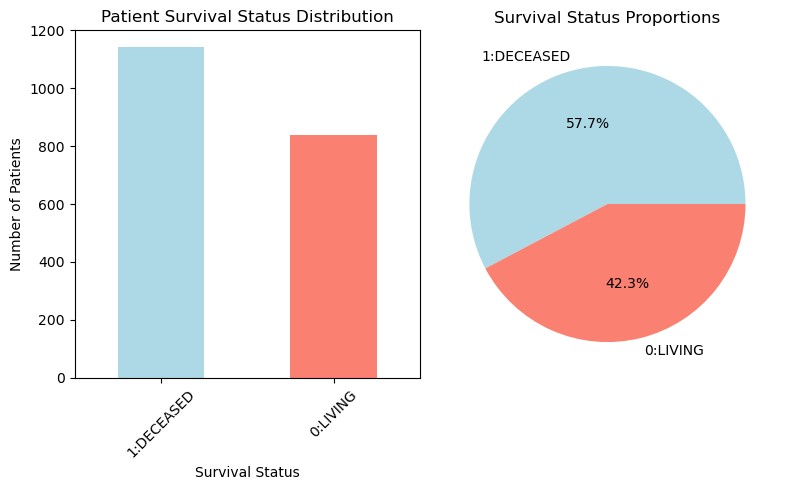

In [73]:
#Visualizing the Overall Survival Status.
y=merged_df['Overall Survival Status']
#visualizing the target variable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
y.value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Patient Survival Status Distribution')
plt.xlabel('Survival Status')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
# Pie chart to show proportions
y.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Survival Status Proportions')
plt.ylabel('')  # Remove y-label for pie chart

plt.tight_layout()
plt.show()

___
### To note:
As per our problem statement , were are predicting overall survival rate and providing recommendations based on treatment therefore, we have two models. One with the target being overall survival rate and the other the target being treatment that is Chemo, Radio and Hormone therapy.
___

___
Due to the curse of dimensionality resulting from over 20,000 gene features, we focused on a subset of biologically significant genes identified through domain knowledge and supported by existing literature.
___

___
Starting with our first model whereby the target variable is treatment and the features are clinical features and gene features combined.
___

In [105]:
# List of columns to check
columns_to_check = ['BRCA1','BRCA2','TP53','HER2','ERBB2','ESR1','PGR','AKT1','PIK3CA','MKI67','CDH1']

# Check which columns exist in MergedDF
existing_columns = [col for col in columns_to_check if col in merged_df.columns]

if existing_columns:
    print("Columns found in MergedDF:", existing_columns)
else:
    print("None of the specified columns were found in MergedDF.")


Columns found in MergedDF: ['BRCA1', 'BRCA2', 'TP53', 'ERBB2', 'ESR1', 'PGR', 'AKT1', 'PIK3CA', 'MKI67', 'CDH1']


In [107]:
#preparing our data by selecting the features we will use.
clinical_features_selected = [
    'Age at Diagnosis',
    'Neoplasm Histologic Grade',
    'HER2 Status',
    'ER Status',
    'PR Status',
    'Tumor Size',
    'Tumor Stage',
    'Lymph nodes examined positive',
    'Mutation Count',
    'Nottingham prognostic index',
    'Inferred Menopausal State'
]

gene_features = ['BRCA1','BRCA2','TP53','ERBB2','ESR1','PGR','AKT1','PIK3CA','MKI67','CDH1'] #we selected this based on domain knowlege.
X_features = clinical_features_selected + gene_features
#defining our variables.
X = merged_df[X_features]
Y = merged_df[['Chemotherapy', 'Radio Therapy', 'Hormone Therapy']]

In [109]:
# Encoding our target variable using the label encoder.
le = LabelEncoder()
Y_encoded = Y.copy()
for col in Y_encoded.columns:
    Y_encoded[col] = le.fit_transform(Y_encoded[col])

___
We use a Label Encoder rather than a One-Hot Encoder for the target variable because it keeps the output as a single numeric column. Label encoding is also appropriate when the target variable is ordinal or when the model can naturally interpret class labels as categories, as in our case.
___

In [111]:
# 3️⃣ SPLIT THE DATA
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y_encoded, test_size=0.2, random_state=42
)

___
Splitting data into train 80% and test 20%. Random state is for reproductibily .
___

In [113]:
#preparing the data before feeding it into a model.
#making sure that both our categorical columns and numerical coluumns are consistent with their dtypes and converting them to lists.
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()
#preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
) 

___
ColumnTransformer allows for different transformations on different columns in one go.
StandardScaler()- applied to numerical columns so standardize them so that the standard deviation can be between 0-1
OneHotEncoder- applied to categorical columns to convert strings to dummy variables.
___
 

### Visualizations (1)

This section explores key clinical and treatment-related patterns in the METABRIC dataset through a series of visual analyses.  
The goal is to understand how **tumor stage, receptor status, and tumor size** relate to both **survival outcomes** and **treatment types**.

---

#### Overall Survival Status Distribution
The first visualization examines the distribution of **Overall Survival Status** to understand the proportion of patients who survived versus those who did not.

- **Objective:** Identify class balance and the general survival trend within the dataset.  
- **Visualization:** Bar chart and pie chart displaying the number and proportion of survivors versus deceased patients.

---

#### Tumor Stage vs. Chemotherapy
- **Question:** Are higher-stage patients more likely to receive **chemotherapy**?  
- **Objective:** Assess whether patients with more advanced tumors tend to receive chemotherapy.  
- **Visualization:** Grouped bar plot comparing chemotherapy administration across tumor stages.

---

#### Tumor Stage vs. Radiotherapy
- **Question:** Are higher-stage patients more likely to receive **radiotherapy**?  
- **Objective:** Explore if radiotherapy is more common among patients with advanced tumor stages.  
- **Visualization:** Bar chart showing radiotherapy frequency per tumor stage.

---

#### Tumor Stage vs. Hormone Therapy
- **Question:** Are higher-stage patients more likely to receive **hormone therapy**?  
- **Objective:** Determine whether hormone therapy usage increases with disease progression or is independent of stage.  
- **Visualization:** Stacked bar plot of hormone therapy distribution across different tumor stages.

---

#### Receptor Status vs. Hormone Therapy
- **Question:** Do **receptor-positive** patients receive more **hormone therapy**?  
- **Objective:** Check if hormone therapy decisions align with receptor biology (e.g., ER+, PR+ patients).  
- **Visualization:** Count plot showing hormone therapy distribution between receptor-positive and receptor-negative groups.

---

#### Tumor Size vs. Treatment Type
- **Question:** Does **tumor size** dictate which treatment a patient receives?  
- **Objective:** Examine whether larger tumors are associated with more aggressive treatments such as chemotherapy or radiotherapy.  
- **Visualization:** Box plots comparing tumor size across treatment groups (Chemotherapy, Radiotherapy, Hormone Therapy).

---

#### Summary
These visualizations highlight how **tumor stage**, **receptor status**, and **tumor size** influence treatment decisions and survival outcomes.  
The insights derived here help guide the **modeling phase** by identifying relationships worth testing statistically and predictive features to prioritize.


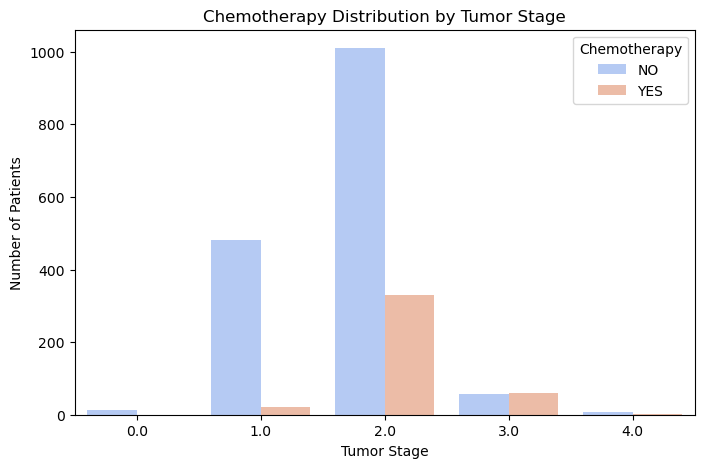

In [183]:
#a few visualizations
#Are higher-stage patients more likely to receive chemotherapy?
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='Tumor Stage', hue='Chemotherapy', palette='coolwarm')
plt.title('Chemotherapy Distribution by Tumor Stage')
plt.xlabel('Tumor Stage')
plt.ylabel('Number of Patients')
plt.show()

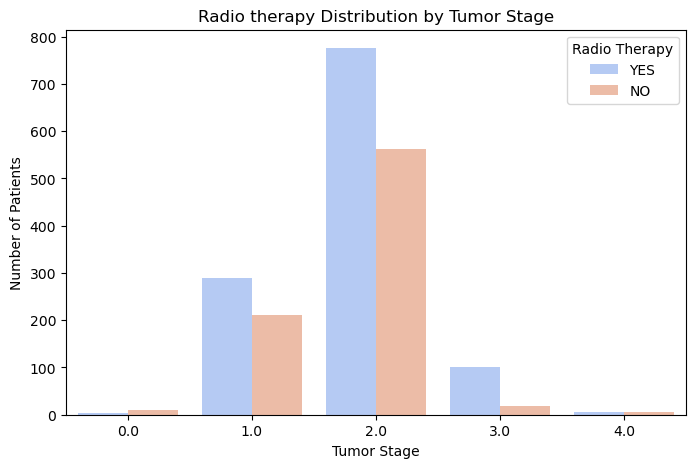

In [185]:
#Are higher-stage patients more likely to receive radio therapy?
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='Tumor Stage', hue='Radio Therapy', palette='coolwarm')
plt.title('Radio therapy Distribution by Tumor Stage')
plt.xlabel('Tumor Stage')
plt.ylabel('Number of Patients')
plt.show()

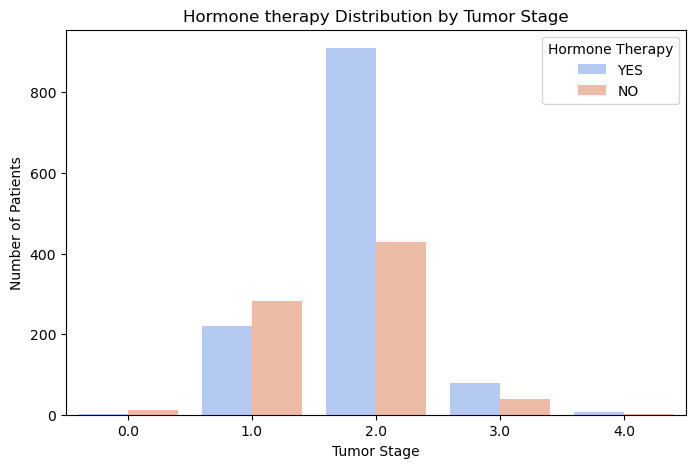

In [187]:
#Are higher-stage patients more likely to receive hormone therapy?
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='Tumor Stage', hue='Hormone Therapy', palette='coolwarm')
plt.title('Hormone therapy Distribution by Tumor Stage')
plt.xlabel('Tumor Stage')
plt.ylabel('Number of Patients')
plt.show()

___
## Interprating the above three visualizations:
Chemotherapy : Tumor stages 0, 1,2,4 are better of with chemotherapy

Radiotherapy: Works better on stages 1, 2 and 3

Hormone therapy: Works better on stages 2,3 and 4
___


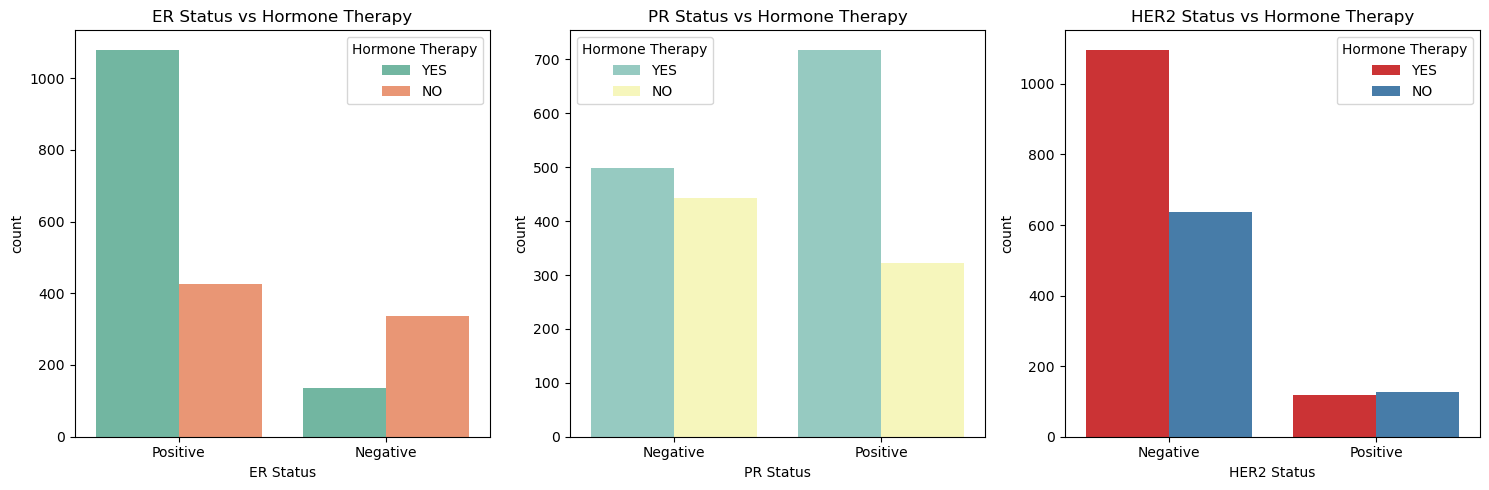

In [190]:
#Do receptor positive patients get hormone treament?
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(data=merged_df, x='ER Status', hue='Hormone Therapy', palette='Set2', ax=ax[0])
sns.countplot(data=merged_df, x='PR Status', hue='Hormone Therapy', palette='Set3', ax=ax[1])
sns.countplot(data=merged_df, x='HER2 Status', hue='Hormone Therapy', palette='Set1', ax=ax[2])
ax[0].set_title('ER Status vs Hormone Therapy')
ax[1].set_title('PR Status vs Hormone Therapy')
ax[2].set_title('HER2 Status vs Hormone Therapy')
plt.tight_layout()
plt.show()


___
## Do receptor positive patients get hormone treament?
For ER and PR  positive patients are better off receiving Hormone therapy.
For HER2 negative patients are better off receiving Hormone therapy.

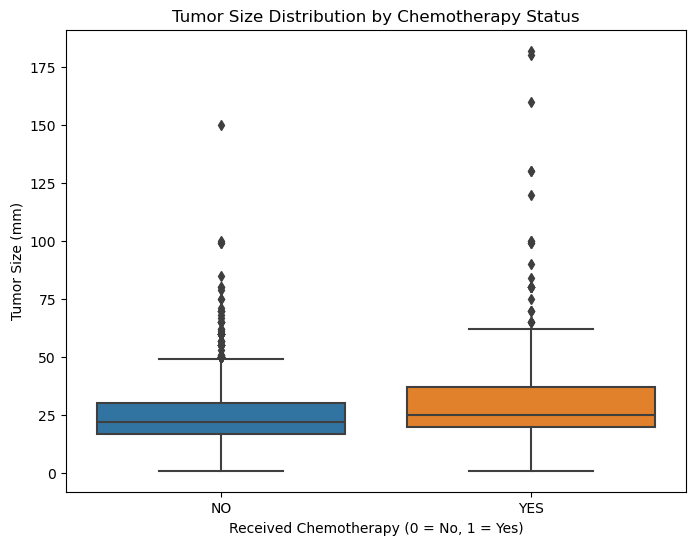

In [197]:
#Does tumor size dictate which treatment a patient receives?
#Chemotherapy
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x='Chemotherapy', y='Tumor Size')
plt.title('Tumor Size Distribution by Chemotherapy Status')
plt.xlabel('Received Chemotherapy (0 = No, 1 = Yes)')
plt.ylabel('Tumor Size (mm)')
plt.show()

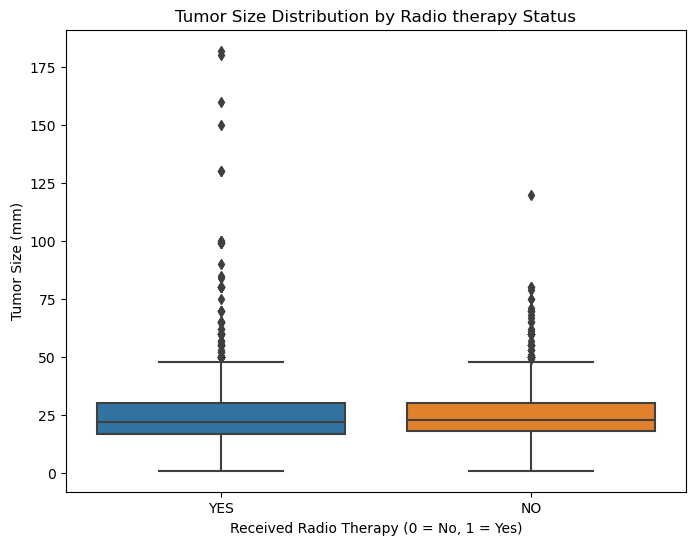

In [199]:
#Does tumor size dictate which treatment a patient receives?
#Radio therapy
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x='Radio Therapy', y='Tumor Size')
plt.title('Tumor Size Distribution by Radio therapy Status')
plt.xlabel('Received Radio Therapy (0 = No, 1 = Yes)')
plt.ylabel('Tumor Size (mm)')
plt.show()

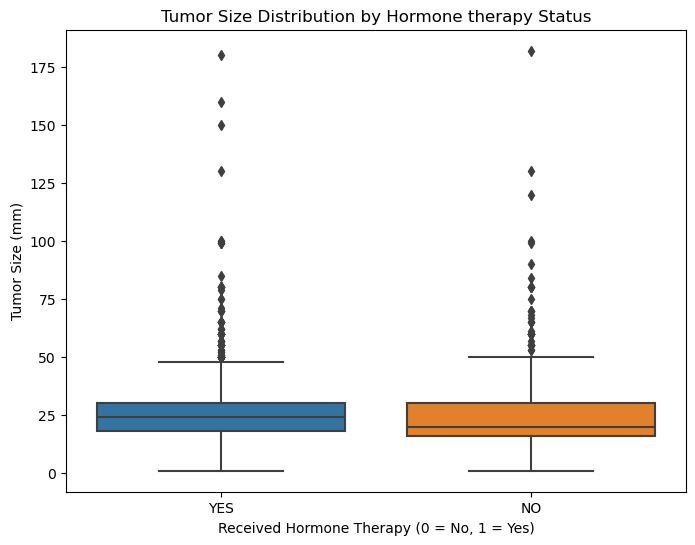

In [201]:
#Does tumor size dictate which treatment a patient receives?
#Hormone therapy
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x='Hormone Therapy', y='Tumor Size')
plt.title('Tumor Size Distribution by Hormone therapy Status')
plt.xlabel('Received Hormone Therapy (0 = No, 1 = Yes)')
plt.ylabel('Tumor Size (mm)')
plt.show()

___
## Interpreting the three above:
Chemotherapy : patients who received chemotherapy have larger median tumor sizes therefore suggesting size plays a role in treatment decision.

Radiotherapy : patients who received radiotherapy have larger median tumor sizes therefore suggesting size plays a role in treatment decision.

Hormone therapy:patients who did not receive hormone therapy have larger median tumor sizes therefore suggesting size does not  play a role in treatment decision.
___


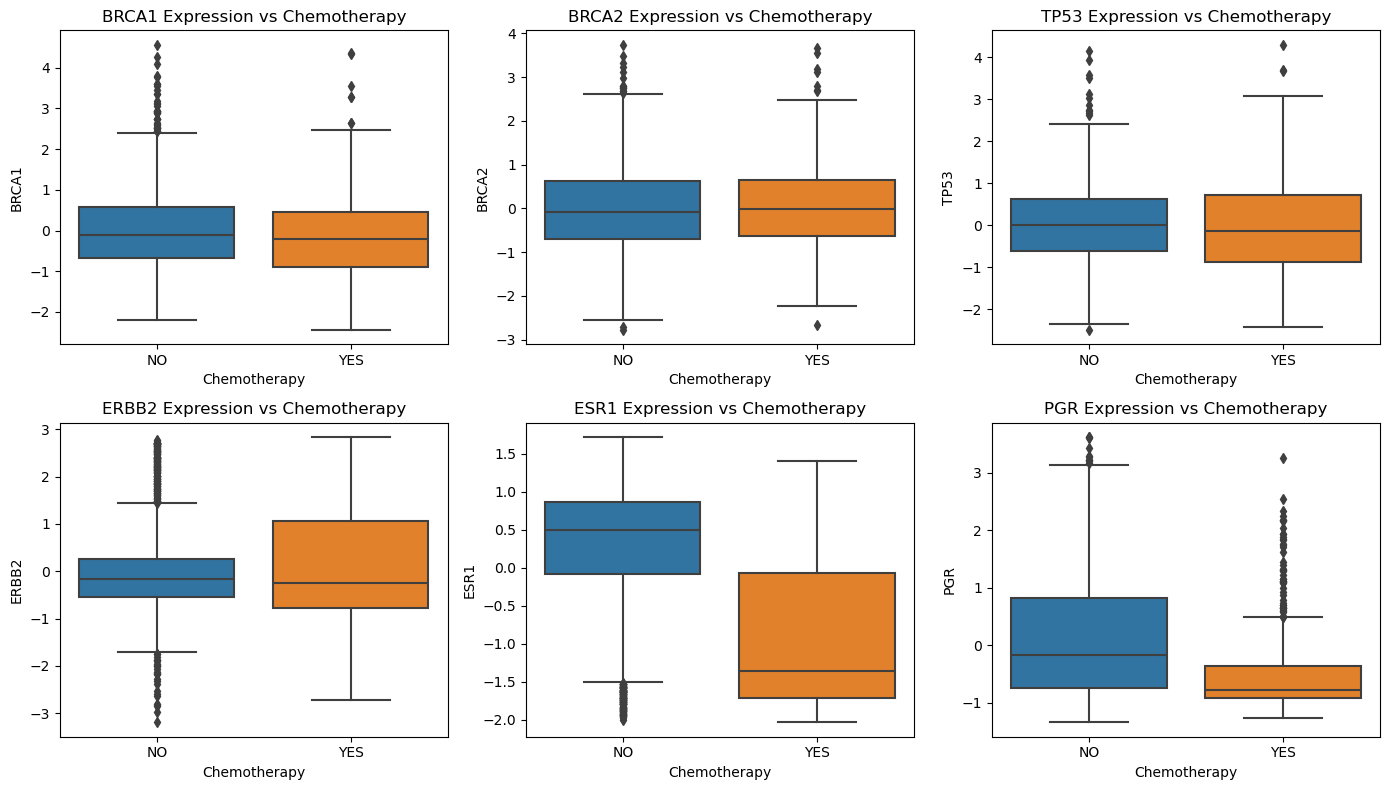

In [206]:
# Research question 1 :Can we identify the most effective treatment approaches (e.g., hormone therapy, radiotherapy, chemotherapy) for patients with specific gene-expression profiles?
genes = ['BRCA1', 'BRCA2', 'TP53', 'ERBB2', 'ESR1', 'PGR']

plt.figure(figsize=(14, 8))
for i, gene in enumerate(genes, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=merged_df, x='Chemotherapy', y=gene)
    plt.title(f'{gene} Expression vs Chemotherapy')
plt.tight_layout()
plt.show()

## 4. Modeling (1)

In this phase, we focus on predicting the **most applicable treatment(s)** for patients based on their clinical and genomic features.

---

### 4.1 Objective
The goal is to develop models that can recommend the appropriate treatment strategy for each patient by predicting:

- **Chemotherapy**  
- **Hormone Therapy**  
- **Radiotherapy**

This is framed as a **multi-label classification problem**, as patients may receive one, two, or all three treatments.

---

### 4.2 Modeling Approach
To address the multi-label nature of the problem, the following approaches are considered:

1. **Binary Relevance (BR) Approach**  
   - Train separate binary classifiers for each treatment type.

2. **Ensemble Methods**  
   - **Random Forest** and **XGBoost** to capture complex feature interactions.

3. **Multi-label Specific Models (optional)**  
   - Algorithms like **Classifier Chains** or **MLkNN** to account for correlations between treatment types.

---

### 4.3 Steps Involved
1. **Data Splitting**  
   - Split the dataset into training and testing subsets (80/20).

2. **Feature Scaling and Encoding**  
   - Standardize continuous variables.  
   - One-hot encode categorical variables.

3. **Model Training**  
   - Baseline: Logistic Regression (one model per treatment).  
   - Advanced: Random Forest or XGBoost (multi-label adaptation).

4. **Model Evaluation**  
   - Metrics for multi-label classification:  
     - **Accuracy per label**  
     - **Hamming Loss**  
     - **F1-score per label**  
     - **Subset Accuracy** (exact match across all labels)

5. **Model Comparison**  
   - Compare baseline and ensemble approaches to identify the most accurate and robust model for treatment recommendation.


In [181]:
# instantiating our models using pipelines.
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    )
}

___
Our target variable treatment has Chemo, Hormone , and Radio therapy.
Looping through the model to allow us to train one model per treatment
___

In [117]:
# Define our baseline model: The logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs')

# Train and save for each treatment
for treatment in Y_train.columns:
    print(f"\nTraining Logistic Regression for treatment: {treatment}")
    
    # Create pipeline
    pipeline_logreg = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', logreg_model)
    ])
    
    # Train the pipeline
    pipeline_logreg.fit(X_train, Y_train[treatment])
    
   
    # Evaluate the model
    y_pred = pipeline_logreg.predict(X_test)
    print(f"Classification Report for {treatment}:\n")
    print(classification_report(Y_test[treatment], y_pred))


Training Logistic Regression for treatment: Chemotherapy
Classification Report for Chemotherapy:

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       309
           1       0.69      0.61      0.65        87

    accuracy                           0.85       396
   macro avg       0.79      0.77      0.78       396
weighted avg       0.85      0.85      0.85       396


Training Logistic Regression for treatment: Radio Therapy
Classification Report for Radio Therapy:

              precision    recall  f1-score   support

           0       0.55      0.28      0.37       164
           1       0.62      0.84      0.72       232

    accuracy                           0.61       396
   macro avg       0.59      0.56      0.54       396
weighted avg       0.59      0.61      0.57       396


Training Logistic Regression for treatment: Hormone Therapy
Classification Report for Hormone Therapy:

              precision    recall  f1-sco

In [119]:
# training and evaluating each model

for model_name, model in models.items():
    print("\n" + "="*40)
    print(f" {model_name}")
    print("="*40)
    
    # Build pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train and evaluate each treatment
    for treatment in Y_train.columns:
        print(f"\n=== TREATMENT: {treatment} ===")
        pipeline.fit(X_train, Y_train[treatment])
        y_pred = pipeline.predict(X_test)
        print(classification_report(Y_test[treatment], y_pred))


 Logistic Regression

=== TREATMENT: Chemotherapy ===
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       309
           1       0.69      0.61      0.65        87

    accuracy                           0.85       396
   macro avg       0.79      0.77      0.78       396
weighted avg       0.85      0.85      0.85       396


=== TREATMENT: Radio Therapy ===
              precision    recall  f1-score   support

           0       0.55      0.28      0.37       164
           1       0.62      0.84      0.72       232

    accuracy                           0.61       396
   macro avg       0.59      0.56      0.54       396
weighted avg       0.59      0.61      0.57       396


=== TREATMENT: Hormone Therapy ===
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       151
           1       0.79      0.82      0.80       245

    accuracy                           0.75       396
   

In [121]:

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Create pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Debug: Verify treatment columns
print("Training XGBoost for all treatments:", list(Y_train.columns))

# Train the pipeline on all treatments
try:
    pipeline_xgb.fit(X_train, Y_train)
    print("Successfully trained XGBoost for all treatments")
except Exception as e:
    print(f"Error training XGBoost: {e}")
    raise

# Evaluate the model for each treatment
y_pred = pipeline_xgb.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=Y_test.columns, index=Y_test.index)

for treatment in Y_test.columns:
    print(f"\nClassification Report for {treatment}:\n")
    print(classification_report(Y_test[treatment], y_pred_df[treatment]))

# Save the single model
model_filename = 'xgboost_all_treatments.pkl'
joblib.dump(pipeline_xgb, model_filename)
print(f"Saved XGBoost model for all treatments as {model_filename}")

Training XGBoost for all treatments: ['Chemotherapy', 'Radio Therapy', 'Hormone Therapy']
Successfully trained XGBoost for all treatments

Classification Report for Chemotherapy:

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       309
           1       0.73      0.60      0.66        87

    accuracy                           0.86       396
   macro avg       0.81      0.77      0.79       396
weighted avg       0.86      0.86      0.86       396


Classification Report for Radio Therapy:

              precision    recall  f1-score   support

           0       0.58      0.43      0.49       164
           1       0.66      0.78      0.71       232

    accuracy                           0.63       396
   macro avg       0.62      0.60      0.60       396
weighted avg       0.63      0.63      0.62       396


Classification Report for Hormone Therapy:

              precision    recall  f1-score   support

           0       0.67

In [123]:
# Load the model
loaded_model = joblib.load('xgboost_all_treatments.pkl')

# Predict for all treatments
predictions = loaded_model.predict(X_test)
predictions_df = pd.DataFrame(predictions, columns=Y_test.columns, index=Y_test.index)
print("Sample predictions for all treatments:\n", predictions_df.head())

predictions = pipeline_xgb.predict(X_test)
predictions_df = pd.DataFrame(predictions, columns=Y_test.columns, index=Y_test.index)
print("Sample predictions (native format):\n", predictions_df.head())

Sample predictions for all treatments:
       Chemotherapy  Radio Therapy  Hormone Therapy
1428           0.0            0.0              1.0
56             0.0            0.0              1.0
351            1.0            1.0              0.0
1681           0.0            0.0              1.0
1730           0.0            1.0              1.0
Sample predictions (native format):
       Chemotherapy  Radio Therapy  Hormone Therapy
1428           0.0            0.0              1.0
56             0.0            0.0              1.0
351            1.0            1.0              0.0
1681           0.0            0.0              1.0
1730           0.0            1.0              1.0


___
### Making Predictions for a New Patient.
Here we are simulating how our model will give predictions for a patient based on their clinical and genomic features.
A new dictionary is created that contains the new patients' information. The features match the structure and order of the our training data.
An XGBoost model is loaded and saved and predictions are made to recommend the best treatment mode to our new patient.
___


In [130]:
# Example new patient data (adjust values based on your data)
new_patient_data = {
    'Age at Diagnosis': 45.0,  
    'Neoplasm Histologic Grade': 2,  # (e.g., 1, 2, 3)
    'HER2 Status': 'Negative',  # (e.g., 'Positive', 'Negative')
    'ER Status': 'Positive',  # e.g., 'Positive', 'Negative')
    'PR Status': 'Positive',  # e.g., 'Positive', 'Negative')
    'Tumor Size': 60.0,  # in mm
    'Tumor Stage': 4,  # (e.g., 1, 2, 3, 4)
    'Lymph nodes examined positive': 1,  
    'Mutation Count': 5,  # Numeric
    'Nottingham prognostic index': 4.5,  # Numeric
    'Inferred Menopausal State': 'Post',  # Categorical (e.g., 'Pre', 'Post')
    'BRCA1': 0.1,  # Numeric (e.g., gene expression value)
    'BRCA2': 0.2,
    'TP53': 0.15,
    'ERBB2': 0.3,
    'ESR1': 0.4,
    'PGR': 0.25,
    'AKT1': 0.1,
    'PIK3CA': 0.2,
    'MKI67': 0.3,
    'CDH1': 0.05
}

# Create DataFrame for the new patient
new_patient_df = pd.DataFrame([new_patient_data], columns=X_features)

# Load the saved model
model_filename = 'xgboost_all_treatments.pkl'
try:
    model = joblib.load(model_filename)
    print(f"Loaded model from {model_filename}")
except Exception as e:
    print(f"Error loading {model_filename}: {e}")
    raise

# Make predictions
try:
    predictions = model.predict(new_patient_df)
    predictions_df = pd.DataFrame(predictions, columns=['Chemotherapy', 'Radio Therapy', 'Hormone Therapy'])
    print("\nPredictions for the new patient:")
    print(predictions_df)
except Exception as e:
    print(f"Error making predictions: {e}")
    raise

# Interpret predictions (assuming 0 = No, 1 = Yes)
treatment_map = {0: 'No', 1: 'Yes'}
predictions_interpreted = predictions_df.iloc[0].map(treatment_map).to_dict()
print("\nInterpreted predictions:")
for treatment, value in predictions_interpreted.items():
    print(f"{treatment}: {value}")

Loaded model from xgboost_all_treatments.pkl

Predictions for the new patient:
   Chemotherapy  Radio Therapy  Hormone Therapy
0           1.0            1.0              1.0

Interpreted predictions:
Chemotherapy: Yes
Radio Therapy: Yes
Hormone Therapy: Yes


___
### Part(2)
Target variable is overall survival status and features are clinical predictors + genetic markers
___

In [139]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Define potential clinical and genetic features
clinical_predictors = [
    'Age at Diagnosis',
    'Neoplasm Histologic Grade',
    'HER2 Status',
    'ER Status',
    'PR Status',
    'Tumor Size',
    'Tumor Stage',
    'Lymph nodes examined positive',
    'Mutation Count',
    'Nottingham prognostic index',
    'Inferred Menopausal State',
    'Overall Survival (Months)',
    'Relapse Free Status (Months)',
    'TMB (nonsynonymous)'
]

genetic_markers = [
    'BRCA1', 'BRCA2', 'TP53', 'ERBB2', 'ESR1', 'PGR', 'AKT1', 'PIK3CA',
    'MKI67', 'CDH1', 'BCL10', 'CFH', 'RBM14', 'TAOK2', 'DUSP11', 'ISCU',
    'MARCHF6', 'MOB3B', 'DNAJB6', 'ATG12'
]

# Combine all features
all_predictors = clinical_predictors + genetic_markers

# Prepare data
features_df = merged_df[all_predictors].copy()
target = merged_df['Overall Survival Status'].copy()

# Encode target if categorical (e.g., 'Living'/'Deceased')
if target.dtype == 'object':
    le = LabelEncoder() #instantiating the label encoder
    target = le.fit_transform(target)

# Separate numeric & categorical features
numeric_cols = [
    'Age at Diagnosis', 'Tumor Size', 'Tumor Stage',
    'Lymph nodes examined positive', 'Mutation Count',
    'Nottingham prognostic index', 'Overall Survival (Months)',
    'Relapse Free Status (Months)', 'TMB (nonsynonymous)'
] + genetic_markers

categorical_cols = [
    'Neoplasm Histologic Grade', 'HER2 Status', 'ER Status',
    'PR Status', 'Inferred Menopausal State'
]

# Encode categorical columns
for col in categorical_cols:
    if features_df[col].dtype == 'object':
        features_df[col] = LabelEncoder().fit_transform(features_df[col].astype(str))

# Fill missing values (important before feature selection)
features_df = features_df.fillna(0)

# Select top 20 best features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=20)
selector.fit(features_df, target)

# Get selected feature names
selected_features = [col for col, keep in zip(all_predictors, selector.get_support()) if keep]
print("✅ Top Selected Features:")
print(selected_features)

# Update dataset to only include selected features
features_df = features_df[selected_features]

✅ Top Selected Features:
['Age at Diagnosis', 'Tumor Size', 'Tumor Stage', 'Lymph nodes examined positive', 'Nottingham prognostic index', 'Inferred Menopausal State', 'Overall Survival (Months)', 'Relapse Free Status (Months)', 'ESR1', 'AKT1', 'BCL10', 'CFH', 'RBM14', 'TAOK2', 'DUSP11', 'ISCU', 'MARCHF6', 'MOB3B', 'DNAJB6', 'ATG12']


In [141]:
# Split into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features_df, target, test_size=0.2, random_state=42, stratify=target
)

In [143]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical features among selected ones
selected_numeric = [col for col in selected_features if col in numeric_cols]
selected_categorical = [col for col in selected_features if col in categorical_cols]

# Create preprocessing transformer
data_transformer = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), selected_numeric),
        ('encode', OneHotEncoder(handle_unknown='ignore'), selected_categorical)
    ]
)

### Visualizations (2)

This section explores how **Overall Survival Status** varies across key clinical and genomic variables, providing insights into patient outcomes and disease progression within the METABRIC dataset.

---

#### How does Survival Status vary across Tumor Stage?
We examined the relationship between **Tumor Stage** and **Overall Survival Status** to determine how cancer progression affects patient outcomes.  
Tumor stages range from **1 to 4**, with **stage 4** representing the most severe cases.  
From the visualization, we observe that **survival rates are higher at stage 1**, while **stages 2, 3, and 4** show a greater number of deceased patients compared to survivors.

---

#### How does Survival Status vary across ER Status?
We analyzed the relationship between **Estrogen Receptor (ER) Status** and **Overall Survival Status** to understand the influence of hormonal receptor expression on patient outcomes.  
Both ER-positive and ER-negative groups show a higher number of deceased patients compared to survivors, suggesting that **ER status alone may not be a strong determinant of survival** in this dataset.

---

#### How do Age and Tumor Stage relate to Survival?
We explored the combined effect of **Age at Diagnosis** and **Tumor Stage** on survival outcomes.  
Patients diagnosed at **lower tumor stages (Stage 0–1)** are more likely to be alive, as indicated by the higher concentration of red points.  
Conversely, **higher tumor stages (Stage 3–4)** show a greater proportion of deceased patients (blue), highlighting the impact of disease progression on mortality.  
While **age alone** does not show a sharp cutoff, older patients at higher tumor stages tend to experience **poorer survival outcomes**.

---

#### How does Relapse Status vary across Tumor Stages?
We examined how **Relapse Status** changes with tumor stage.  
Cancers detected at **stages 0–2** show that most patients **do not relapse**, whereas cancers detected at **stages 3–4** show that most patients **do relapse**, indicating that advanced-stage cancers are more prone to recurrence.

---

#### How does Relapse affect Overall Survival?
Finally, we explored how **Relapse** impacts survival outcomes.  
Patients with **recurred cancer** have a **higher chance of being deceased**, emphasizing relapse as a strong negative prognostic factor.


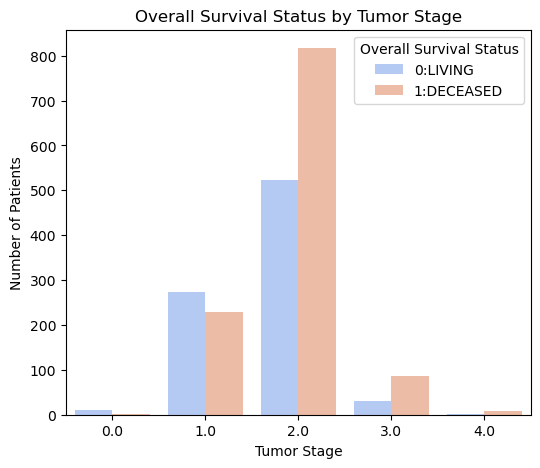

In [156]:
# a few visualizations
#How does Survival status vary across tumor stage?
plt.figure(figsize=(6, 5))
sns.countplot(data=merged_df, x='Tumor Stage', hue='Overall Survival Status', palette='coolwarm')
plt.title('Overall Survival Status by Tumor Stage')
plt.xlabel('Tumor Stage')
plt.ylabel('Number of Patients')
plt.show()

## How does survival status vary across tumor stage?
We examined the relationship between tumor stage and overall survival status to determine how cancer progression affects patient outcomes.
Tumor stages range from 1 to 4, with stage 4 representing the most severe cases. From the visualization, we observe that survival rates are higher at stage 1, while stages 2, 3, and 4 show a greater number of deceased patients compared to survivors.
___

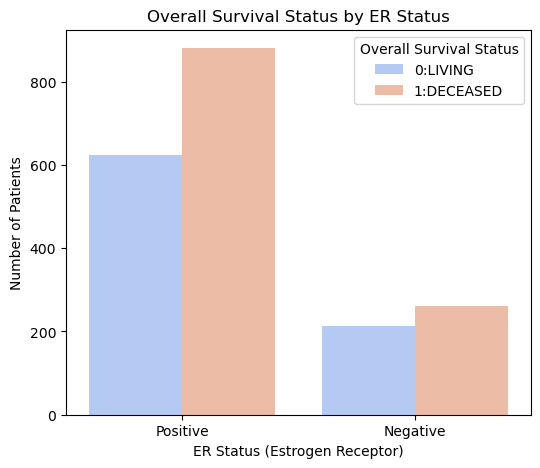

In [164]:
# How does survival status vary across ER Status?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.countplot(data=merged_df, x='ER Status', hue='Overall Survival Status', palette='coolwarm')
plt.title('Overall Survival Status by ER Status')
plt.xlabel('ER Status (Estrogen Receptor)')
plt.ylabel('Number of Patients')
plt.show()


##  How does survival status vary across ER status?
We analyzed the relationship between Estrogen Receptor (ER) Status and Overall Survival Status to understand the influence of hormonal receptor expression on patient outcomes.

Both have higher deceased than surviving.

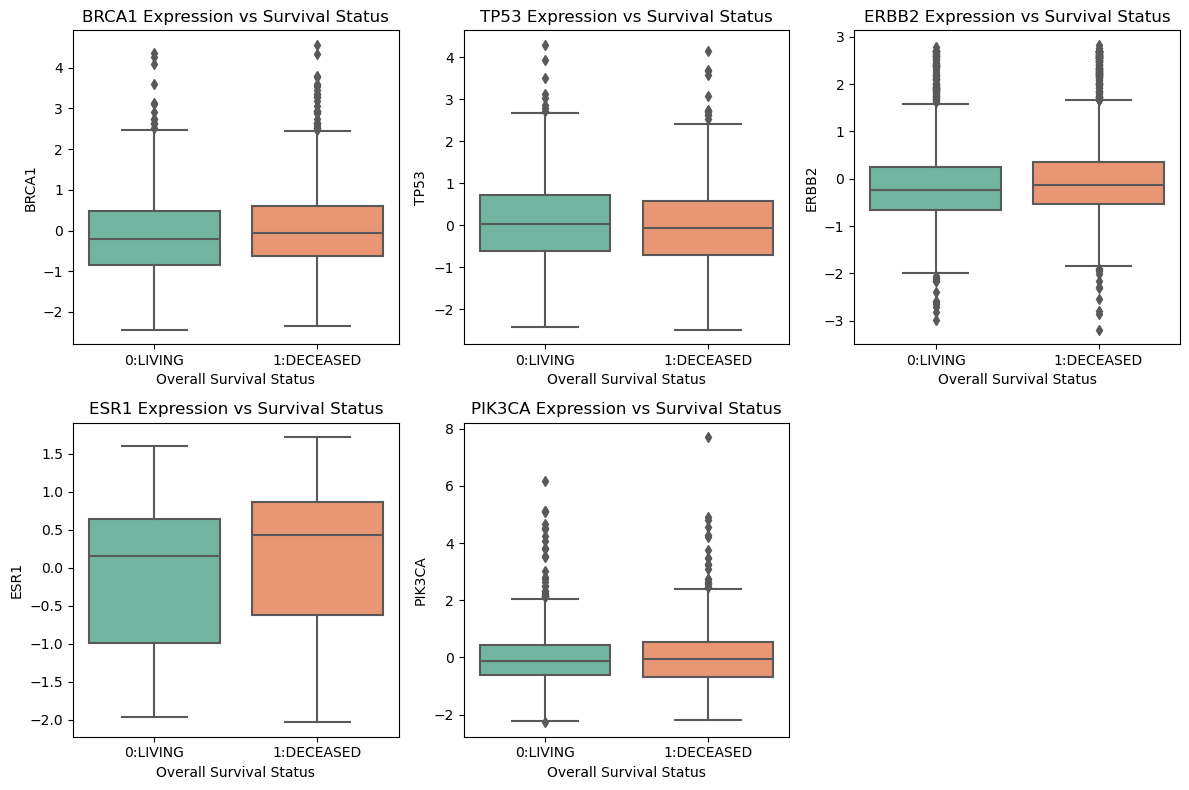

In [166]:
#How does survival vary across genetic markers?
#selecting a few genes for visualizations
top_genes = ['BRCA1', 'TP53', 'ERBB2', 'ESR1', 'PIK3CA']
plt.figure(figsize=(12, 8))
for i, gene in enumerate(top_genes, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=merged_df, x='Overall Survival Status', y=gene, palette='Set2')
    plt.title(f'{gene} Expression vs Survival Status')
plt.tight_layout()
plt.show()

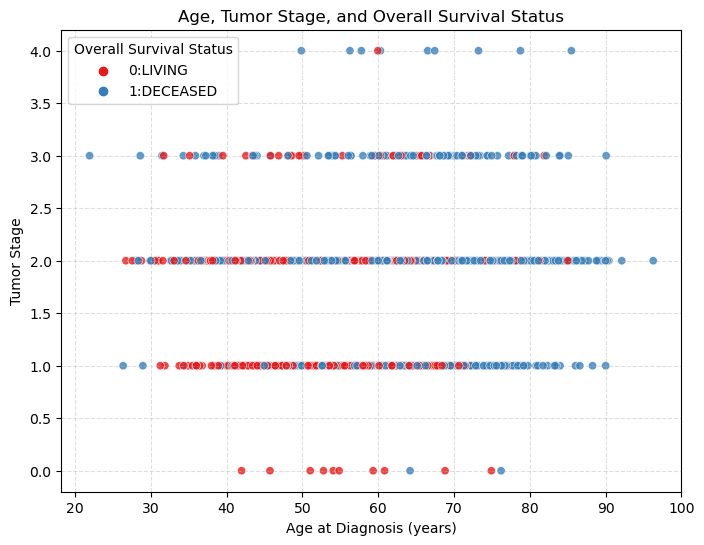

In [168]:
#How does age and tumour stage relate survival?
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=merged_df,
    x='Age at Diagnosis',
    y='Tumor Stage',
    hue='Overall Survival Status',
    palette='Set1',
    alpha=0.8
)
plt.title('Age, Tumor Stage, and Overall Survival Status')
plt.xlabel('Age at Diagnosis (years)')
plt.ylabel('Tumor Stage')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

___
## How does age and tumour stage relate survival?
Patients diagnosed at lower tumor stages (Stage 0–1) are more likely to be alive, as indicated by the higher concentration of red points.

Higher tumor stages (Stage 3–4) show a greater proportion of deceased patients (blue), highlighting the impact of disease progression on mortality.

While age alone does not show a sharp cutoff, there is a tendency for older patients at higher tumor stages to experience poorer survival.
___

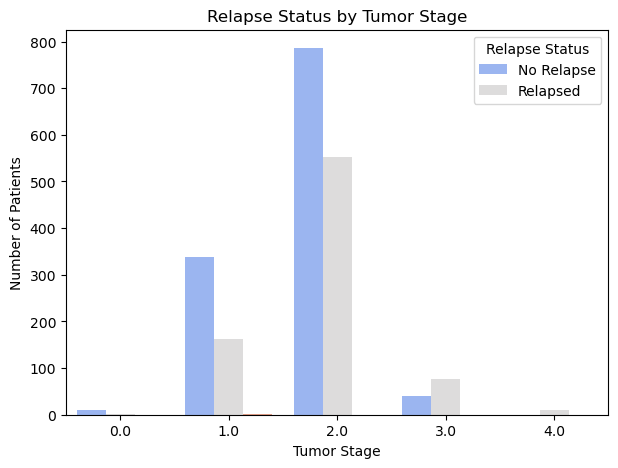

In [171]:
#How does relapse status vary across tumor stages?
plt.figure(figsize=(7,5))
sns.countplot(
    data=merged_df,
    x='Tumor Stage',
    hue='Relapse Free Status',
    palette='coolwarm'
)
plt.title('Relapse Status by Tumor Stage')
plt.xlabel('Tumor Stage')
plt.ylabel('Number of Patients')
plt.legend(title='Relapse Status', labels=['No Relapse', 'Relapsed'])
plt.show()

___
## How does relapse status vary across tumor stages?
Cancer detected between stage 0 and 2 see that most patients do not relapse while cancer detected between stage 3 and 4 see that most patients relapse.

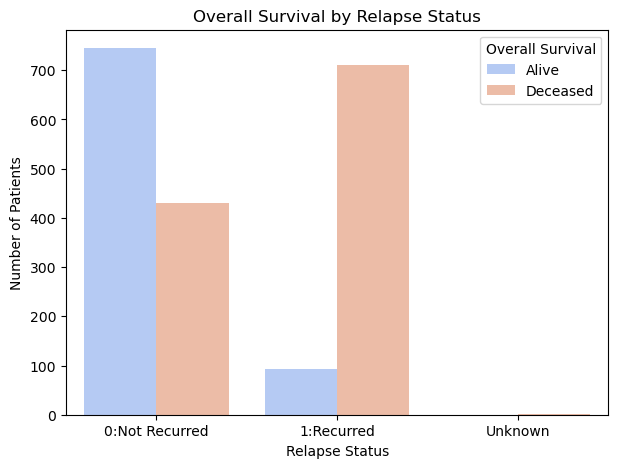

In [175]:
#How does relapse affect overall survival?
plt.figure(figsize=(7,5))
sns.countplot(
    data=merged_df,
    x='Relapse Free Status',
    hue='Overall Survival Status',
    palette='coolwarm'
)
plt.title('Overall Survival by Relapse Status')
plt.xlabel('Relapse Status')
plt.ylabel('Number of Patients')
plt.legend(title='Overall Survival', labels=['Alive', 'Deceased'])
plt.show()


___
## How does relapse affect overall survival?
Patients with recurred cancer had a higher chance of being deceased.

## 4. Modeling (2)

In this phase, we focus on predicting **Overall Survival Status** using clinical and genomic features from the METABRIC dataset.

---

### 4.1 Objective
The goal is to build machine learning models capable of distinguishing between **patients who survived** and those who **did not**, based on their tumor characteristics, receptor status, and treatment history.

---

### 4.2 Modeling Approach
A **Logistic Regression** model serves as the **baseline** due to its simplicity, interpretability, and effectiveness in binary classification problems.  
To capture more complex, nonlinear relationships and improve predictive accuracy, **ensemble models** such as **Random Forest** and **XGBoost** are also implemented.

---

### 4.3 Steps Involved
1. **Data Splitting**  
   - The dataset is divided into training and testing subsets (typically 80/20 split).

2. **Feature Scaling**  
   - Continuous variables are standardized using `StandardScaler` to ensure uniform scaling across features.

3. **Model Training**  
   - Baseline model: **Logistic Regression**  
   - Advanced models: **Random Forest** and **XGBoost**

4. **Model Evaluation**  
   - Performance is assessed using metrics such as:  
     - **Accuracy**  
     - **Precision**  
     - **Recall**  
     - **F1-score**  
     - **ROC-AUC Score**

5. **Model Comparison**  
   - The results from all three models are compared to identify the most effective one for predicting survival outcomes.


In [145]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Pipeline for Logistic Regression
logistic_pipeline = Pipeline(steps=[
    ('transformer', data_transformer),
    # ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000))
])

# Train the model
logistic_pipeline.fit(train_features, train_target)

# Predict and evaluate
logistic_preds = logistic_pipeline.predict(test_features)
print("Logistic Regression Accuracy:", accuracy_score(test_target, logistic_preds))
print("Classification Report:\n", classification_report(test_target, logistic_preds))

Logistic Regression Accuracy: 0.7702020202020202
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       167
           1       0.82      0.77      0.80       229

    accuracy                           0.77       396
   macro avg       0.77      0.77      0.77       396
weighted avg       0.77      0.77      0.77       396



Random Forest Accuracy: 0.8106060606060606
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       167
           1       0.84      0.83      0.83       229

    accuracy                           0.81       396
   macro avg       0.81      0.81      0.81       396
weighted avg       0.81      0.81      0.81       396

ROC-AUC Score: 0.845


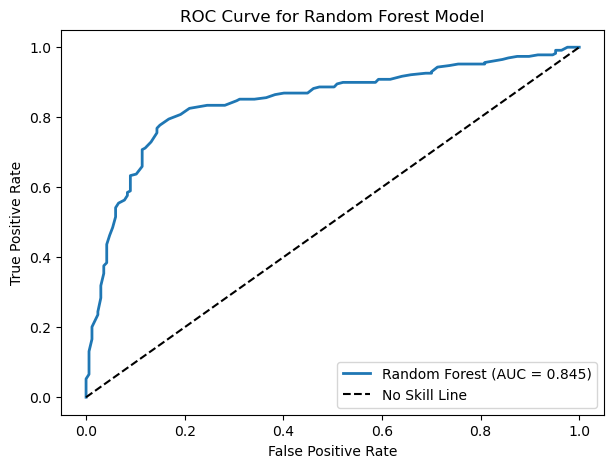

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# ✅ Pipeline for Random Forest
forest_pipeline = Pipeline(steps=[
    ('transformer', data_transformer),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# ✅ Train the model
forest_pipeline.fit(train_features, train_target)

# ✅ Predict and evaluate
forest_preds = forest_pipeline.predict(test_features)
print("Random Forest Accuracy:", accuracy_score(test_target, forest_preds))
print("Classification Report:\n", classification_report(test_target, forest_preds))

# ✅ Get predicted probabilities for the positive class
rf_probs = forest_pipeline.predict_proba(test_features)[:, 1]

# ✅ Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_target, rf_probs)
roc_auc = roc_auc_score(test_target, rf_probs)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# ✅ Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')
plt.show()


In [149]:
# Pipeline for SVM
svm_pipeline = Pipeline(steps=[
    ('transformer', data_transformer),
    ('classifier', SVC(kernel='rbf', random_state=42))
])

# Train the model
svm_pipeline.fit(train_features, train_target)

# Predict and evaluate
svm_preds = svm_pipeline.predict(test_features)
print("SVM Accuracy:", accuracy_score(test_target, svm_preds))
print("Classification Report:\n", classification_report(test_target, svm_preds))

SVM Accuracy: 0.7575757575757576
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69       167
           1       0.76      0.84      0.80       229

    accuracy                           0.76       396
   macro avg       0.75      0.74      0.75       396
weighted avg       0.76      0.76      0.75       396



In [151]:
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline

# XGBoost pipeline
xgb_pipeline = Pipeline(steps=[
    ('transformer', data_transformer),
    ('classifier', XGBClassifier(
        random_state=42,
        eval_metric='logloss',  # use eval_metric instead of use_label_encoder
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5
    ))
])

# Train the model
xgb_pipeline.fit(train_features, train_target)

# Predict and evaluate
xgb_preds = xgb_pipeline.predict(test_features)
print("XGBoost Accuracy:", accuracy_score(test_target, xgb_preds))
print("Classification Report:\n", classification_report(test_target, xgb_preds))

XGBoost Accuracy: 0.7904040404040404
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       167
           1       0.81      0.83      0.82       229

    accuracy                           0.79       396
   macro avg       0.79      0.78      0.78       396
weighted avg       0.79      0.79      0.79       396



## Key Insights and Recommendations

### Survival Prediction Insights

Three models, Logistic Regression, SVM, and XGBoost were trained to predict overall survival. Among them, XGBoost achieved the best performance with an accuracy of approximately 79%, followed by Logistic Regression at 77% and SVM at 76%.

These results indicate that combining gene expression profiles with clinical variables provides a reliable basis for estimating patient survival. Logistic Regression and SVM offered consistent but slightly lower performance, suggesting linear relationships capture part of the signal, while XGBoost better models complex, non-linear interactions.

The correlation analysis revealed that certain genes, such as IL6ST, TYW3, and KIF13B, were positively correlated with overall survival, while Age at Diagnosis showed a mild negative correlation, aligning with clinical expectations that younger patients often have better outcomes.

Treatment Prediction Insights

Models were also developed to predict whether patients received Chemotherapy, Radio Therapy, or Hormone Therapy. Across all algorithms, XGBoost consistently outperformed others, reaching about 87% accuracy for Chemotherapy, 77% for Hormone Therapy, and around 61% for Radio Therapy.

Chemotherapy and hormone therapy predictions showed strong alignment between the model and actual treatment outcomes, suggesting these are influenced by measurable genomic and clinical factors. However, radio therapy predictions were weaker, likely due to additional clinical decision factors not captured in the dataset — such as tumor location or physician preference.

### Key Insights

1. XGBoost is the most effective model across both survival and treatment prediction tasks, demonstrating its strength in handling complex relationships between genetic and clinical data.

2. Chemotherapy and hormone therapy outcomes can be predicted with high confidence, showing clear patterns in the data.

3. Radio therapy predictions remain modest, indicating missing predictors or higher variability in clinical decision-making.

4. Certain genes, particularly IL6ST, TYW3, and KIF13B may serve as potential biomarkers associated with improved survival.

5. Age at diagnosis negatively impacts survival, confirming known clinical patterns.

### Recommendations

1. Adopt XGBoost as the primary predictive model for both survival and treatment prediction, given its superior performance and reliability.

2. Incorporate additional clinical features such as tumor grade, histological type, and receptor status (ER, PR, HER2) to improve model performance, especially for radio therapy prediction.

3. Analyze feature importance from XGBoost models to identify key genes driving survival and treatment outcomes, potentially informing biomarker discovery and personalized treatment strategies.

4. Validate models using cross-validation and external datasets to ensure generalizability and reduce overfitting risks.

5. Develop a user-friendly interface (e.g., Streamlit or Flask) to enable clinicians to input patient data and receive predictive insights on expected survival and suitable treatments.

6. Continue integrating genomic data with clinical decision support, as the findings demonstrate that machine learning models can meaningfully assist in predicting patient outcomes and optimizing treatment strategies.



In [153]:
import joblib

# Save the full pipeline (preprocessing + SMOTE + model)
joblib.dump(forest_pipeline, "random_forest_survival_model.pkl")

print("✅ Model saved successfully as random_forest_survival_model.pkl")

✅ Model saved successfully as random_forest_survival_model.pkl
